In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('uber.csv')

In [32]:
df.head(5)
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [33]:
df = df.drop(['Unnamed: 0', 'key', 'pickup_datetime'], axis = 1)
df.dropna(inplace=True)

In [34]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1


<Axes: ylabel='fare_amount'>

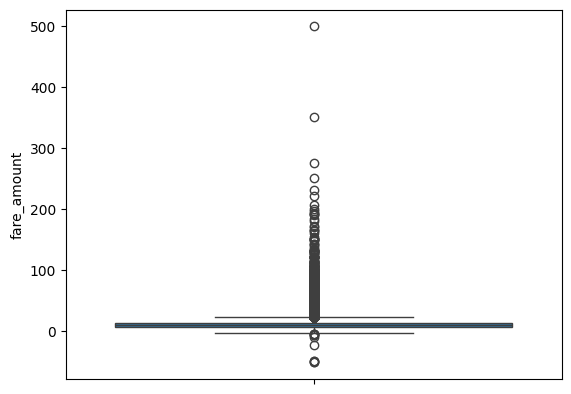

In [35]:
sns.boxplot(df['fare_amount'])

In [36]:
low = df['fare_amount'].quantile(0.05)
high = df['fare_amount'].quantile(0.95)
df = df[(df['fare_amount'] > low) & (df['fare_amount'] < high)]

<Axes: ylabel='fare_amount'>

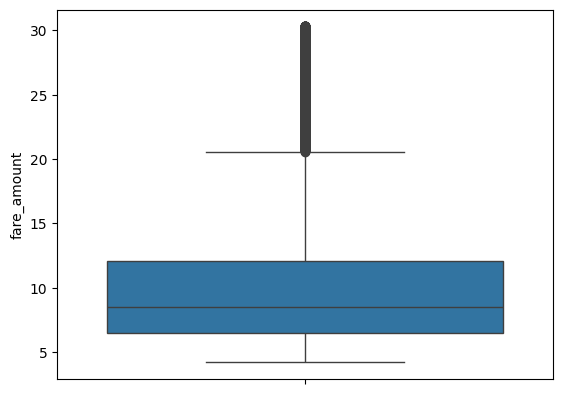

In [37]:
sns.boxplot(df['fare_amount'])

<Axes: >

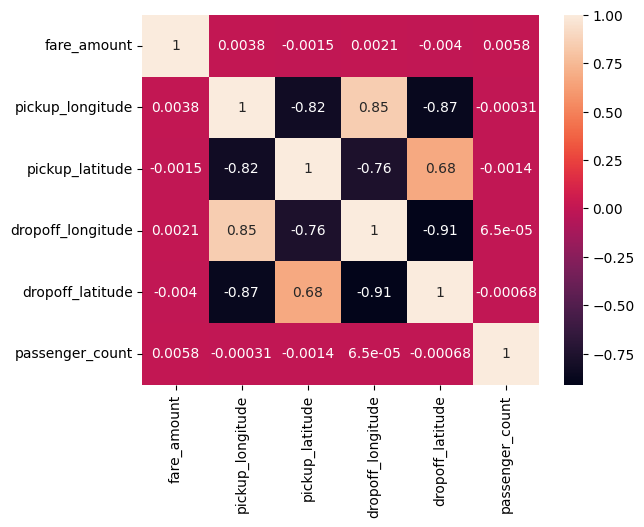

In [38]:
corr = df.corr()
sns.heatmap(corr, annot=True)

In [39]:
from sklearn.model_selection import train_test_split
x = df.drop(['fare_amount'], axis=1)
y = df['fare_amount']
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE', rmse)
r2 = r2_score(y_test, y_pred)
print('R2', r2)

RMSE 5.158780935193318
R2 -5.870734573698577e-05


In [43]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [44]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE', rmse)
r2 = r2_score(y_test, y_pred)
print('R2', r2)

RMSE 2.6364599841763643
R2 0.7387996880581954
